# Projeto 1 - Introdução Ciências de Dados

Dupla: Rubens Lima(rnl2) e Caio Possídio (cpv)

## Passo 1 - Coleta de Dados
Para a coleta de dados utilizamos um csv do Kaggle do dataset do FC 24

Primeiramente vamos importat a biblioteca de pandas

In [1]:
import pandas as pd
import numpy as np

C:\Users\rubin\AppData\Local\Temp\ipykernel_21884\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rubdelima/if697-intro-data-science/main/male_players.csv')

df.head()

C:\Users\rubin\AppData\Local\Temp\ipykernel_21884\3278722285.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/rubdelima/if697-intro-data-science/main/male_players.csv')


player_id                             player_url  fifa_version  \
0     231747    /player/231747/kylian-mbappe/240002          24.0   
1     239085   /player/239085/erling-haaland/240002          24.0   
2     192985  /player/192985/kevin-de-bruyne/240002          24.0   
3     158023     /player/158023/lionel-messi/240002          24.0   
4     165153    /player/165153/karim-benzema/240002          24.0   

   fifa_update update_as_of    short_name                       long_name  \
0          2.0   2023-09-22     K. Mbappé            Kylian Mbappé Lottin   
1          2.0   2023-09-22    E. Haaland            Erling Braut Haaland   
2          2.0   2023-09-22  K. De Bruyne                 Kevin De Bruyne   
3          2.0   2023-09-22      L. Messi  Lionel Andrés Messi Cuccittini   
4          2.0   2023-09-22    K. Benzema                   Karim Benzema   

  player_positions  overall  potential  ...   ldm   cdm   rdm   rwb    lb  \
0           ST, LW       91         94  ...  63+3  63+3  63+3  68+3  63+3   
1               ST       91         94  ...  63+3  63+3  63+3  62+3  60+3   
2          CM, CAM       91         91  ...  80+3  80+3  80+3  79+3  75+3   
3          CF, CAM       90         90  ...  63+3  63+3  63+3  64+3  59+3   
4           CF, ST       90         90  ...  64+3  64+3  64+3  64+3  60+3   

    lcb    cb   rcb    rb    gk  
0  54+3  54+3  54+3  63+3  18+3  
1  62+3  62+3  62+3  60+3  19+3  
2  70+3  70+3  70+3  75+3  21+3  
3  49+3  49+3  49+3  59+3  19+3  
4  55+3  55+3  55+3  60+3  18+3  

[5 rows x 109 columns]

## Passo 2 - Pré-Processamento de Dados


### 2.0 - Removendo dados inúteis e Criando classes


#### 2.0.1 - Removendo colunas que não vão ajudar na análise

In [3]:
inutil_labels = [
    'player_id','player_url', 'fifa_version', 'fifa_update','update_as_of','short_name','long_name','overall','potential','value_eur','wage_eur','age','dob', 
    'height_cm','weight_kg','club_team_id','club_name','league_id','league_name','league_level','club_position','club_jersey_number','club_loaned_from','club_joined_date',
    'club_contract_valid_until_year','nationality_id','nationality_name','nation_team_id','nation_position','nation_jersey_number','preferred_foot','weak_foot','skill_moves',
    'international_reputation','work_rate','body_type','real_face','release_clause_eur','player_tags','player_traits','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
    'goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed',
    'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']

df.drop(df[df['player_positions'] == 'GK'].index, inplace=True)
df = df.drop(inutil_labels, axis=1)
df.head()

player_positions  pace  shooting  passing  dribbling  defending  physic  \
0           ST, LW  97.0      90.0     80.0       92.0       36.0    78.0   
1               ST  89.0      93.0     66.0       80.0       45.0    88.0   
2          CM, CAM  72.0      88.0     94.0       87.0       65.0    78.0   
3          CF, CAM  80.0      87.0     90.0       94.0       33.0    64.0   
4           CF, ST  79.0      88.0     83.0       87.0       39.0    78.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  ...  \
0                  78                   94                          73  ...   
1                  47                   96                          83  ...   
2                  95                   85                          55  ...   
3                  83                   89                          60  ...   
4                  75                   91                          90  ...   

   power_long_shots  mentality_aggression  mentality_interceptions  \
0                83                    64                       38   
1                86                    87                       43   
2                92                    75                       66   
3                90                    44                       40   
4                81                    63                       39   

   mentality_positioning  mentality_vision  mentality_penalties  \
0                     93                83                   84   
1                     96                74                   84   
2                     88                95                   83   
3                     91                92                   75   
4                     92                90                   85   

   mentality_composure  defending_marking_awareness  \
0                 88.0                           26   
1                 87.0                           38   
2                 88.0                           66   
3                 96.0                           20   
4                 90.0                           43   

   defending_standing_tackle  defending_sliding_tackle  
0                         34                        32  
1                         47                        29  
2                         70                        53  
3                         35                        24  
4                         24                        18  

[5 rows x 36 columns]

#### 2.0.2 - Criando novas classes para dos dados
No dateset que pegamos o valor da posição do jogador poderia ser tanto uma lista de string como um uma string. Além disso também algumas posições de jogadores são muito similares como RDM, CDM e LDM, LB e RB, só alterando o lado do jogador do campo, mas isso não interfere nos valores do calculo da posição do jogador.

Então criamos uma função para simplificar os dados, é retornado uma "normalização" da posição dependendo caso seja uma lista, é pego o


In [4]:
# Selecionado apenas uma posição

positions_dict = {
 'CAM' : "Meia Atacante",
 'CB' : "Zagueiro",
 'CDM' : "Volante",
 'CF' : "Segundo Atacante",
 'CM' : "Meia",
 'LB' : "Lateral",
 'LM' : "Meia Aberto",
 'LW' : "Ponta",
 'LWB' : "Ala",
 'RB' : "Lateral",
 'RM' : "Meia Aberto",
 'RW' : "Ponta",
 'RWB' : "Ala",
 'ST' : "Atacante",
 "GK" : "Goleiro"
}

def select_prefeer_position(data:str):
  if "," in data:
    data =  data.split(",")[0]
  return positions_dict[data]

df["player_positions"] =  df["player_positions"].apply(select_prefeer_position)



#### 2.0.3 - Removendo os goleiro
Os goleiros possuem atributos próprios de goleiro, tendo seu Overall definido por eles, não levando em conta os outros atributos

In [5]:
# Removendo os goleiros
df.drop(df[df['player_positions'] == 'GK'].index, inplace=True)
df.head(10)

player_positions  pace  shooting  passing  dribbling  defending  physic  \
0           Atacante  97.0      90.0     80.0       92.0       36.0    78.0   
1           Atacante  89.0      93.0     66.0       80.0       45.0    88.0   
2               Meia  72.0      88.0     94.0       87.0       65.0    78.0   
3   Segundo Atacante  80.0      87.0     90.0       94.0       33.0    64.0   
4   Segundo Atacante  79.0      88.0     83.0       87.0       39.0    78.0   
5           Atacante  75.0      91.0     80.0       87.0       44.0    84.0   
7           Atacante  69.0      93.0     84.0       83.0       49.0    83.0   
8              Ponta  95.0      82.0     78.0       90.0       29.0    68.0   
10           Volante  58.0      73.0     80.0       80.0       85.0    84.0   
11          Zagueiro  62.0      39.0     66.0       69.0       89.0    87.0   

    attacking_crossing  attacking_finishing  attacking_heading_accuracy  ...  \
0                   78                   94                          73  ...   
1                   47                   96                          83  ...   
2                   95                   85                          55  ...   
3                   83                   89                          60  ...   
4                   75                   91                          90  ...   
5                   76                   93                          91  ...   
7                   80                   95                          89  ...   
8                   78                   89                          50  ...   
10                  63                   64                          81  ...   
11                  54                   29                          87  ...   

    power_long_shots  mentality_aggression  mentality_interceptions  \
0                 83                    64                       38   
1                 86                    87                       43   
2                 92                    75                       66   
3                 90                    44                       40   
4                 81                    63                       39   
5                 84                    81                       49   
7                 87                    80                       42   
8                 80                    58                       26   
10                82                    83                       84   
11                26                    93                       86   

    mentality_positioning  mentality_vision  mentality_penalties  \
0                      93                83                   84   
1                      96                74                   84   
2                      88                95                   83   
3                      91                92                   75   
4                      92                90                   85   
5                      94                81                   90   
7                      94                87                   92   
8                      87                81                   65   
10                     75                82                   62   
11                     39                51                   45   

    mentality_composure  defending_marking_awareness  \
0                  88.0                           26   
1                  87.0                           38   
2                  88.0                           66   
3                  96.0                           20   
4                  90.0                           43   
5                  88.0                           35   
7                  92.0                           46   
8                  79.0                           32   
10                 85.0                           88   
11                 81.0                           91   

    defending_standing_tackle  defending_sliding_tackle  
0                          34                  

### 2.1 - Defininição de Tipos

In [6]:
# @markdown Vamos primeiramente identificar quais os tipos de dados que temos no nosso datastet
print("Tipos no dataset")
print(df.dtypes)

# @markdown Verificamos que nossos dados possuem object (as classes), e tipos numéricoscomo int64 e float64, mas queremos apenas int64

# @markdown Mas antes de fazermos a conversão, vamos identificar se precisamos fazer uma limpeza de dados

# @markdown Vmaos verificar agora se em players_positions há apenas str
print(df['player_positions'].apply(type).value_counts())

# @markdown Podemos observar que só há itens que são do tipo str, logo todos os dados da coluna são String e não precisamos mais de tratamento


Tipos no dataset
player_positions                object
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration            int64
movement_sprint_speed            int64
movement_agility                 int64
movement_reactions               int64
movement_balance                 int64
power_shot_power                 int64
power_jumping                    int64
power_stamina                    int64
power_st

In [7]:

# @markdown Mas antes de fazermos a conversão, vamos identificar se precisamos fazer uma limpeza de dados

# @markdown Vmaos verificar agora se em players_positions há apenas str
print(df['player_positions'].apply(type).value_counts())

# @markdown Podemos observar que só há itens que são do tipo str, logo todos os dados da coluna são String e não precisamos mais de tratamento


player_positions
<class 'str'>    159997
Name: count, dtype: int64


### 2.2 - Tratamento de dados ausentes

#### 2.2.1 - Verificando se há arquivos NaN ou nulos no dataframe

In [8]:
# Verificarndo valores NaN
has_nan = df.isnull().values.any()
print(f"Existem valores NaN no DataFrame? {has_nan}")

# Verificando valores Infinitos
numeric_cols = df.select_dtypes(include=[np.number]).columns

has_inf = np.isinf(df[numeric_cols].values).any()
print(f"Existem valores infinitos no DataFrame? {has_inf}")

Existem valores NaN no DataFrame? True
Existem valores infinitos no DataFrame? False


#### 2.2.2 - Removendo NaN por mediana nos campos

In [9]:
# Vamos criar um df com os dados originais mas com um drop pos  itens NaN
df_without_nan = df.dropna()

# Preencher valores ausentes com a mediana nas colunas numéricas
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verificando se ainda temos NaN no dataset
has_nan = df.isnull().values.any()
print(f"Existem valores NaN no DataFrame? {has_nan}")

Existem valores NaN no DataFrame? False


### 2.3 - Normalização e Discretização

No caso a Discretização não se aplica ao nosso dataset

In [10]:
#@title 2.3.2 - Normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### 2.4 - Limpeza de Dados

#### 2.4.1 - Univariado: Identificação e tratamento de outliers

In [11]:
df['pace'].describe()

count    159997.000000
mean          0.619195
std           0.145577
min           0.000000
25%           0.539474
50%           0.631579
75%           0.723684
max           1.000000
Name: pace, dtype: float64

<Axes: >

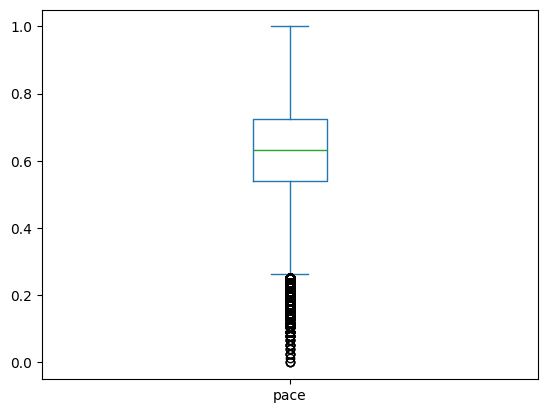

In [12]:
df['pace'].plot.box()

<Axes: >

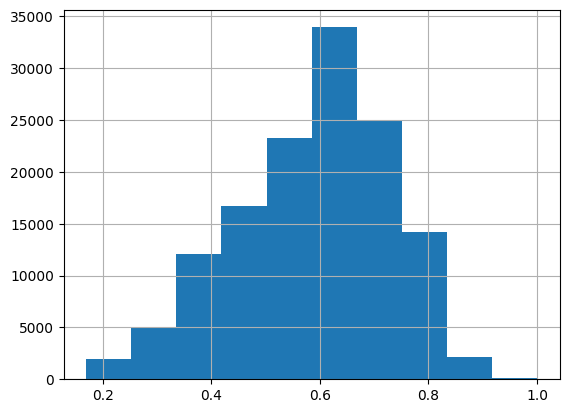

In [17]:
df['pace'].hist()

In [14]:
from scipy import stats
import matplotlib.pyplot as plt

# Função para identificar outliers usando o método de Tukey
def identify_outliers_tukey(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Função para identificar outliers usando Z-score robusto
def identify_outliers_zscore_robust(df, column, threshold=3.5):
    median = df[column].median()
    mad = (df[column] - median).abs().median()
    z_score_robust = 0.6745 * (df[column] - median) / mad
    outliers = df[z_score_robust.abs() > threshold]
    return outliers

univar_outl_indices = set()

for col in numeric_cols:
    outliers_tukey = identify_outliers_tukey(df, col)
    outliers_zscore_robust = identify_outliers_zscore_robust(df, col)
    
    if not outliers_tukey.empty:
        univar_outl_indices.update(outliers_tukey.index)
    if not outliers_zscore_robust.empty:
        univar_outl_indices.update(outliers_zscore_robust.index)

print(f"Em {len(univar_outl_indices)} linhas foram encontrados outliers.")

# Remover as linhas com outliers do DataFrame
df_cleaned = df.drop(index=univar_outl_indices)

print(f"Tamanho original do DataFrame: {df.shape[0]} linhas")
print(f"{100 - (100*df_cleaned.shape[0]/df.shape[0])}% das linhas possuem outliers e foram removidos")

# Visualização do DataFrame limpo
df = df_cleaned

Em 25801 linhas foram encontrados outliers.
Tamanho original do DataFrame: 159997 linhas
83.87407263886197% das linhas possuem outliers e foram removidos
   player_positions      pace  shooting   passing  dribbling  defending  \
40         Zagueiro  0.763158    0.4625  0.608108   0.540541   0.935065   
41            Ponta  0.842105    0.8375  0.797297   0.878378   0.597403   
42         Zagueiro  0.592105    0.5875  0.594595   0.621622   0.922078   
43         Zagueiro  0.842105    0.4500  0.662162   0.662162   0.935065   
48            Ponta  0.947368    0.7875  0.824324   0.878378   0.285714   

      physic  attacking_crossing  attacking_finishing  \
40  0.876923            0.559524             0.534884   
41  0.661538            0.857143             0.848837   
42  0.907692            0.488095             0.465116   
43  0.846154            0.690476             0.441860   
48  0.461538            0.892857             0.755814   

    attacking_heading_accuracy  ...  power_long_shot

<Axes: >

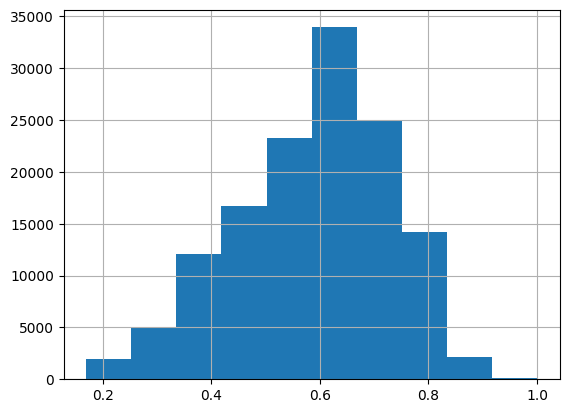

In [ ]:
df['pace'].hist()

Fizemos duas funções para verificar seno código foi encontrado algum outlierusandoométodo de z-score robusto ou por meio de tukey

### 2.4.2 - Multivariados

Primeiramente vamos identificar quais pares estão  bêm inteligados na realação binária

In [31]:
correlation_matrix  = df[numeric_cols].corr(method='spearman')
threshold = 0.9 
high_corr_pairs = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if (abs(correlation_matrix.loc[row, col]) > threshold and row != col) and (
            (col, row, correlation_matrix.loc[row, col]) not in high_corr_pairs
        ):
            high_corr_pairs.append((row, col, correlation_matrix.loc[row, col]))

print(f"\nPares de variáveis com alta correlação {len(high_corr_pairs)}:")

high_corr_pairs.sort(key=lambda x : x[2], reverse=True)

for pair in high_corr_pairs:
    print(f"{pair[0]} e {pair[1]}: {pair[2]}")



Pares de variáveis com alta correlação 15:
defending_standing_tackle e defending: 0.9801284958366288
skill_dribbling e dribbling: 0.9724532788268133
defending_marking_awareness e defending: 0.970986160737826
movement_sprint_speed e pace: 0.9700481741898974
defending_sliding_tackle e defending_standing_tackle: 0.9641185424093168
defending_sliding_tackle e defending: 0.963710269352859
mentality_interceptions e defending: 0.9584947836846278
movement_acceleration e pace: 0.9570053232642334
attacking_finishing e shooting: 0.9541212398943443
defending_standing_tackle e defending_marking_awareness: 0.9300728382136837
defending_standing_tackle e mentality_interceptions: 0.9292372309303208
defending_sliding_tackle e defending_marking_awareness: 0.921564655028888
skill_ball_control e dribbling: 0.9162330916617134
defending_sliding_tackle e mentality_interceptions: 0.908983322101643
defending_marking_awareness e mentality_interceptions: 0.9076531566792687


In [32]:
print(correlation_matrix.loc["movement_sprint_speed", "movement_acceleration"])
print(correlation_matrix.loc["skill_ball_control", "skill_dribbling"])

0.8634081108959781
0.853288791247469


Observamos então que alguns atributos de defesa estão bêm correlacionados um com os outros, são esses:
1. Atributos de Defesa: (defending_standing_tackle, defending, defending_marking_awareness,defending_sliding_tackle, mentality_interceptions)

2. Atributos de Drible (skill_dribbling, dribbling, skill_ball_control)


3. Atributos de velocidade (movement_sprint_speed, pace,movement_acceleration)

Observe abaixo o plot dos gráficos, que embora possuam uma correlação boa, skill_ball_control e skill_dribbling possuem uma grande quantidade de outliers

<Axes: xlabel='skill_ball_control', ylabel='dribbling'>

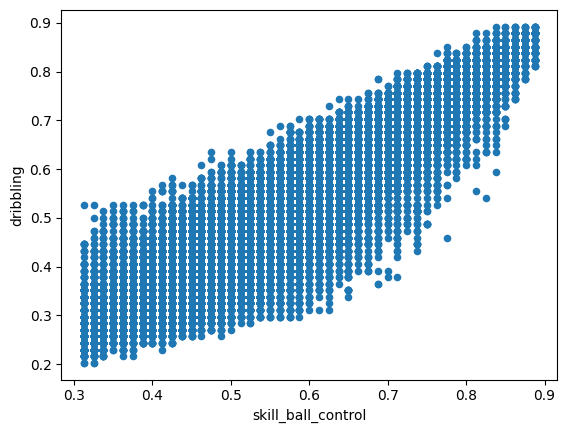

In [16]:
df.plot.scatter(x="skill_ball_control", y="dribbling")

<Axes: xlabel='skill_ball_control', ylabel='skill_dribbling'>

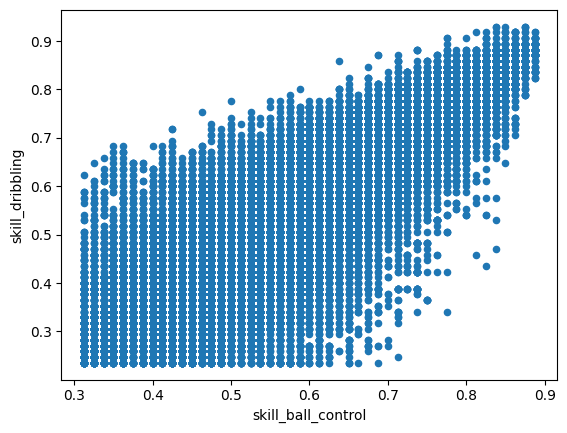

In [20]:
df.plot.scatter(x="skill_ball_control", y="skill_dribbling")


Como nãoencontramos uma multi de relaçao binária, o que vamos fazer é fazer a remoção de outliers multivariados com o Mahalanobis

In [28]:
from scipy.spatial.distance import mahalanobis
import seaborn as sns


def mahalanobis_distance(df, columns):
    cov_matrix = np.cov(df[columns].values.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_distr = df[columns].mean(axis=0)
    distances = df[columns].apply(lambda row: mahalanobis(row, mean_distr, inv_cov_matrix), axis=1)
    return distances

def remove_multi_outliers(df, columns):
    # Calcular a distância de Mahalanobis para cada ponto
    df['mahalanobis_dist'] = mahalanobis_distance(df, columns)

    # Determinar o limiar para outliers (usamos um valor alto como threshold)
    threshold = df['mahalanobis_dist'].mean() + 3 * df['mahalanobis_dist'].std()

    # Visualizar os outliers no gráfico de dispersão antes da remoção
    sns.pairplot(df[columns])
    plt.suptitle('Antes da Remoção de Outliers', y=1.02)
    plt.show()

    # Remover os outliers do DataFrame
    df_cleaned = df[df['mahalanobis_dist'] <= threshold]

    # Visualizar os gráficos de dispersão após a remoção dos outliers
    sns.pairplot(df_cleaned[columns])
    plt.suptitle('Após a Remoção de Outliers', y=1.02)
    plt.show()

    # Remover a coluna de distância de Mahalanobis após a limpeza
    df_cleaned = df_cleaned.drop(columns=['mahalanobis_dist'])
    return df_cleaned

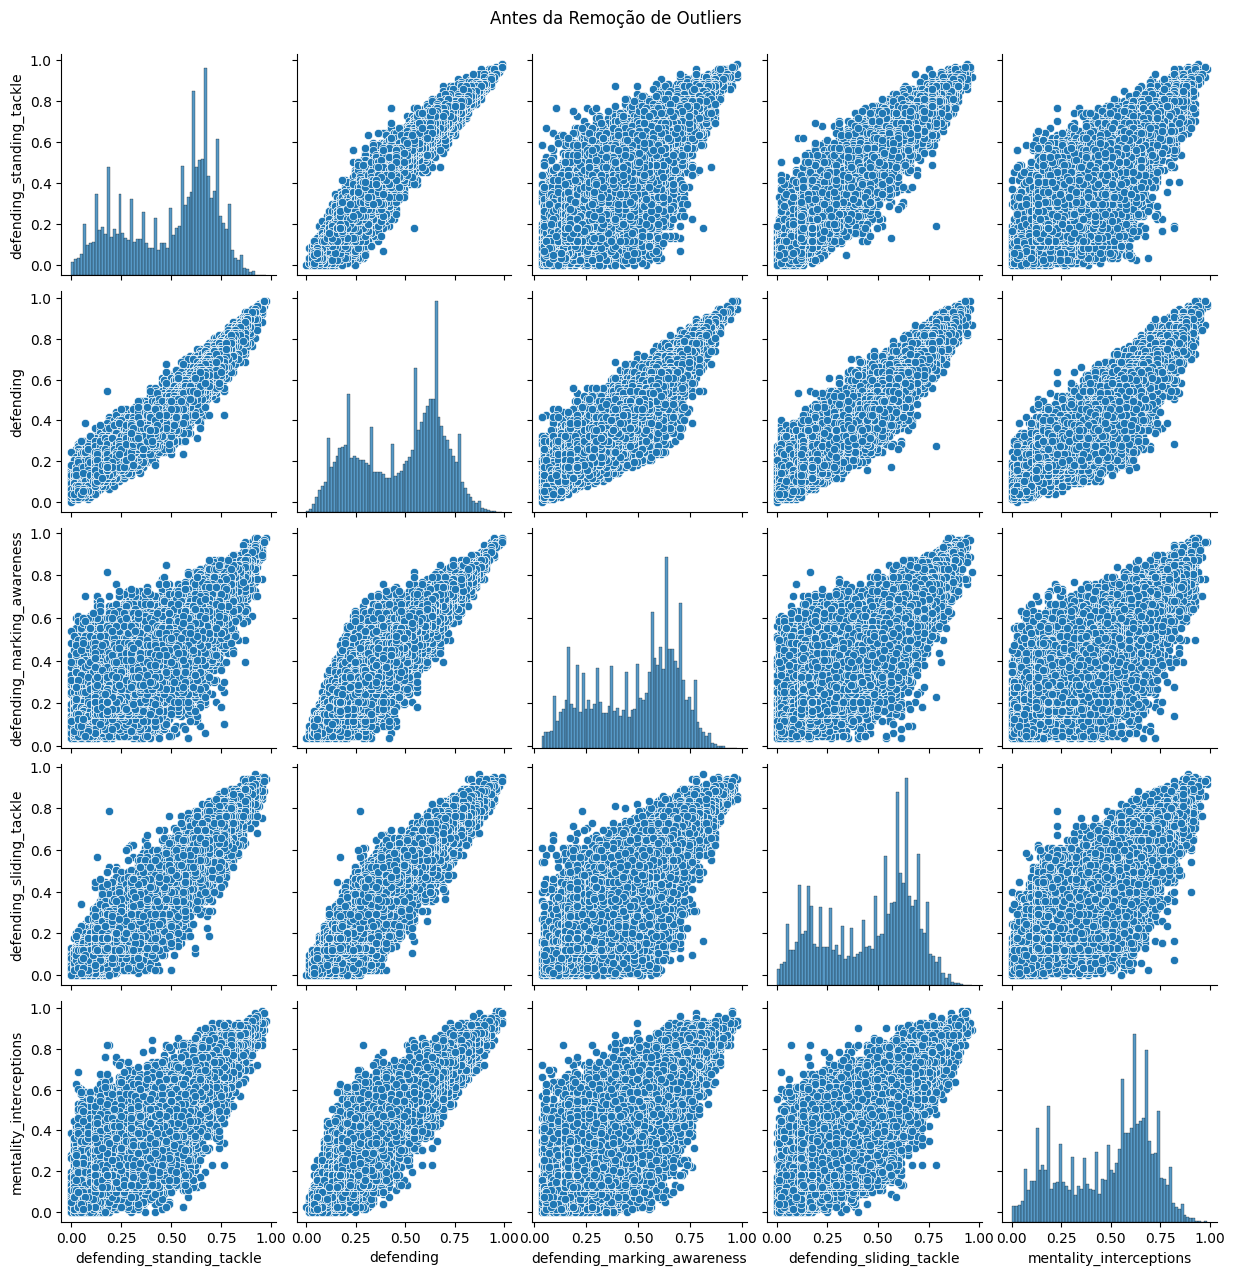

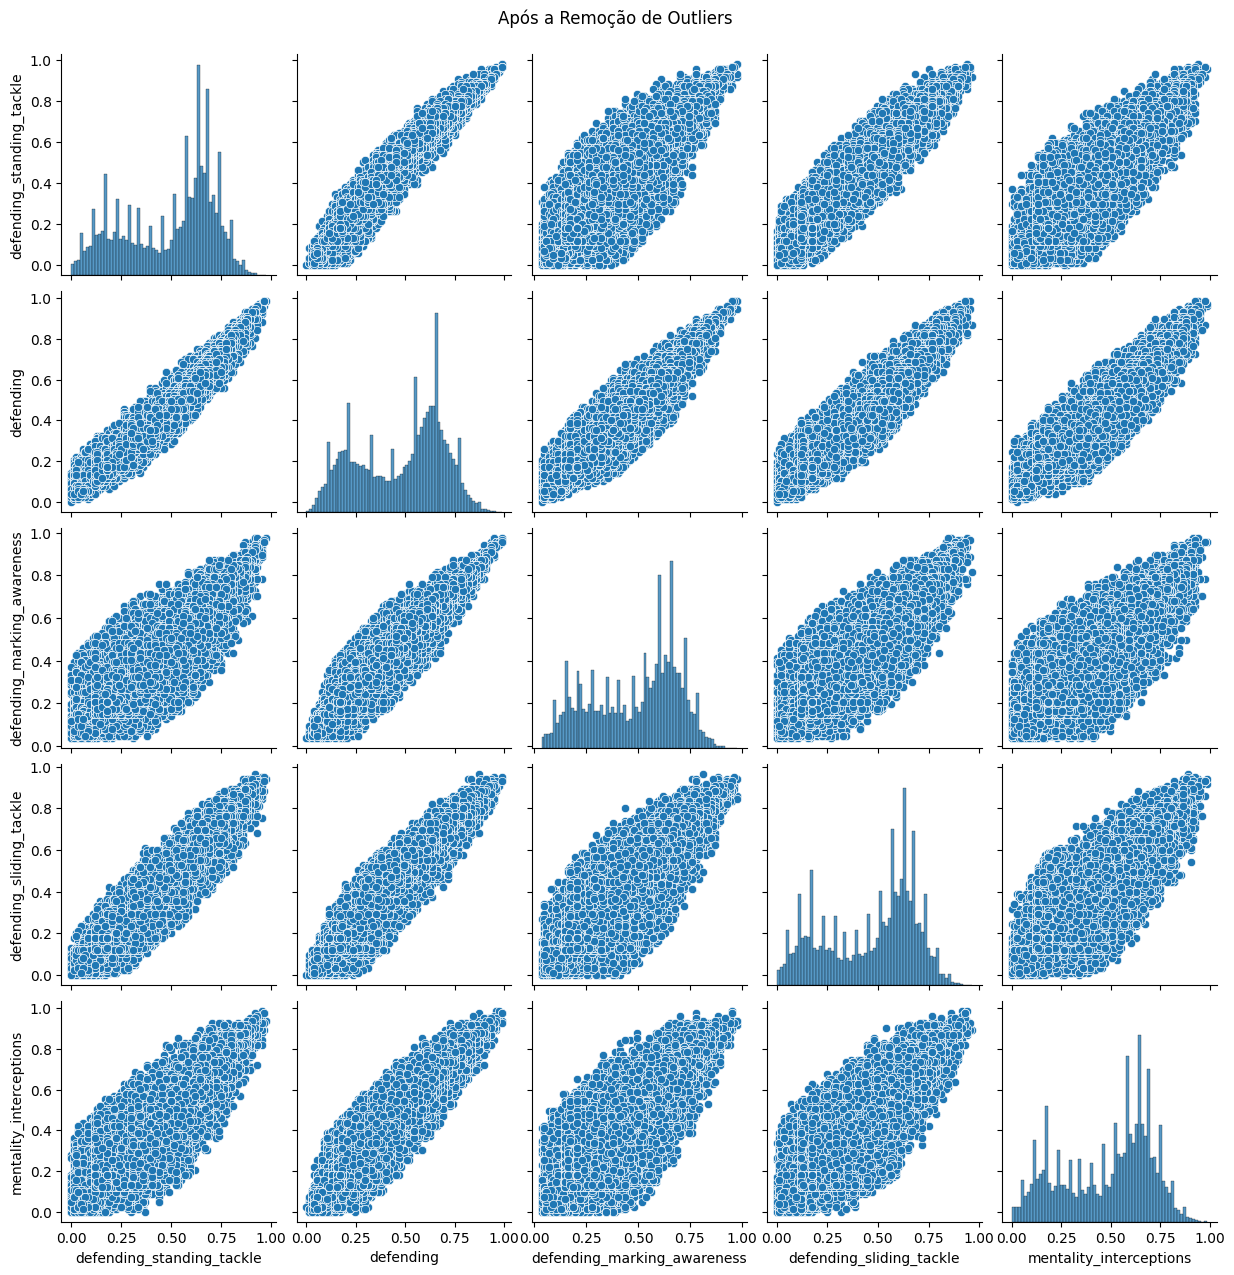

In [30]:
df = remove_multi_outliers(df, 
    ['defending_standing_tackle', 'defending', 'defending_marking_awareness', 'defending_sliding_tackle', 'mentality_interceptions'])

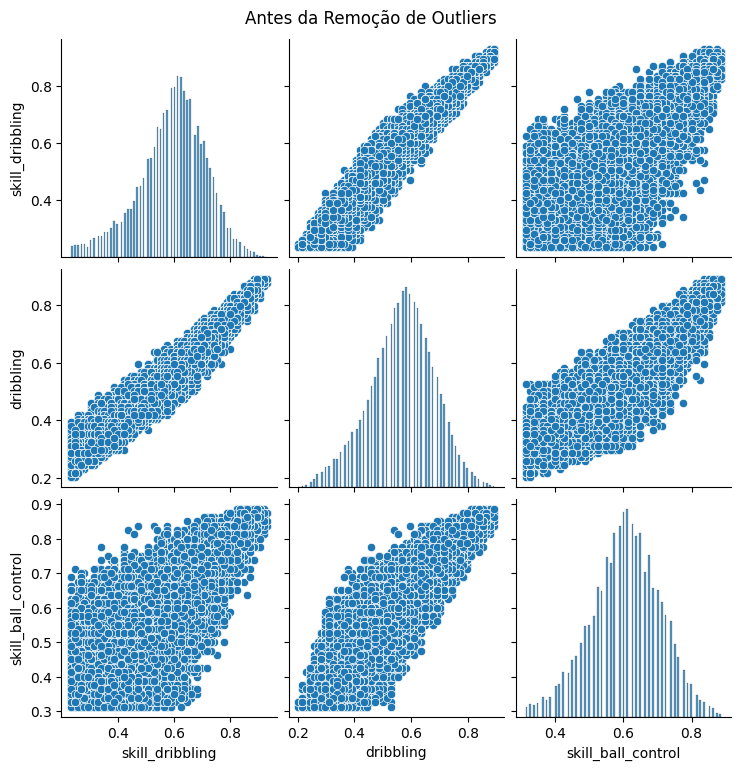

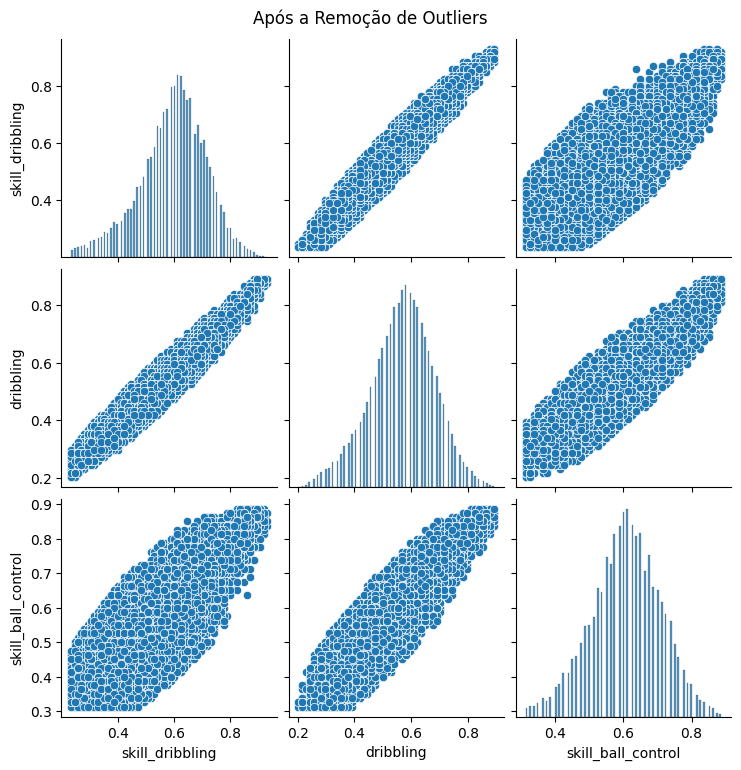

In [29]:
df = remove_multi_outliers(df, 
                           ["skill_dribbling", "dribbling", "skill_ball_control"])

Outliers identificados pela distância de Mahalanobis:
       player_positions      pace  shooting   passing  dribbling  defending  \
81             Zagueiro  0.802632    0.5000  0.689189   0.594595   0.909091   
154            Zagueiro  0.605263    0.2250  0.648649   0.662162   0.922078   
300            Zagueiro  0.605263    0.2875  0.527027   0.527027   0.870130   
388            Zagueiro  0.750000    0.2250  0.472973   0.540541   0.844156   
539             Lateral  0.657895    0.7125  0.824324   0.810811   0.779221   
...                 ...       ...       ...       ...        ...        ...   
179007         Atacante  0.486842    0.4375  0.324324   0.418919   0.220779   
179318          Volante  0.447368    0.3750  0.391892   0.405405   0.350649   
179631    Meia Atacante  0.539474    0.2875  0.500000   0.378378   0.324675   
179801         Atacante  0.565789    0.4250  0.216216   0.310811   0.155844   
179817    Meia Atacante  0.486842    0.2750  0.472973   0.378378   0.233766  

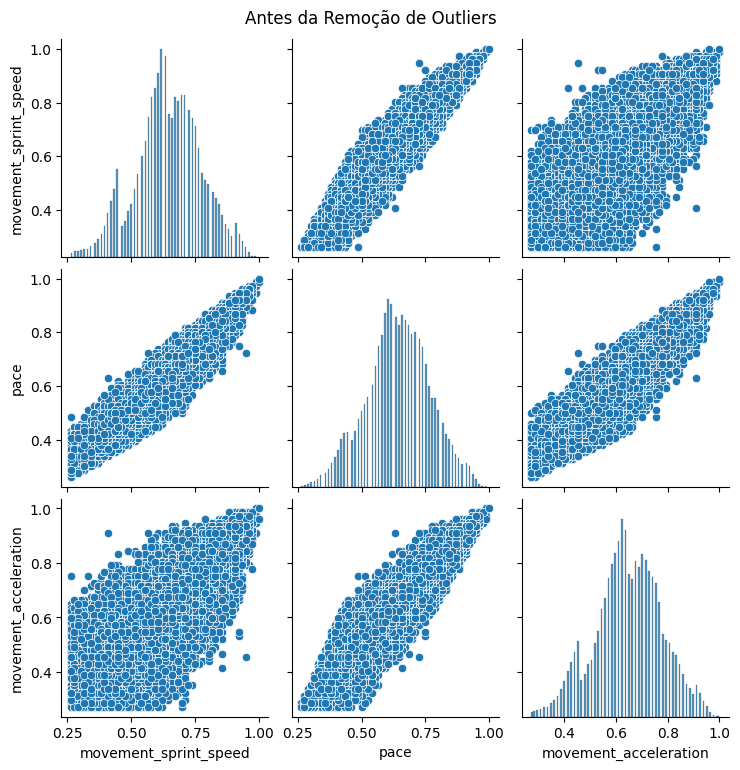

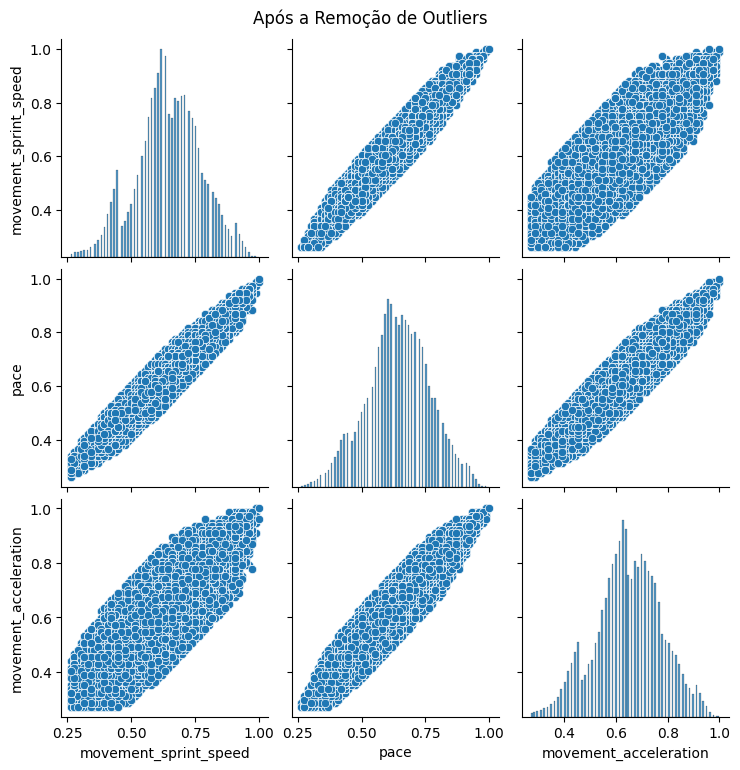


Matriz de correlação após a remoção de outliers:
                                 pace  shooting   passing  dribbling  \
pace                         1.000000  0.305317  0.220563   0.505351   
shooting                     0.305317  1.000000  0.556965   0.718354   
passing                      0.220563  0.556965  1.000000   0.783152   
dribbling                    0.505351  0.718354  0.783152   1.000000   
defending                   -0.252772 -0.432230  0.229132  -0.130414   
physic                      -0.129174  0.000485  0.170583  -0.000677   
attacking_crossing           0.381123  0.401149  0.806065   0.675591   
attacking_finishing          0.317988  0.956357  0.423950   0.647831   
attacking_heading_accuracy  -0.206042  0.088831  0.016255  -0.042832   
attacking_short_passing      0.083256  0.410512  0.894003   0.656810   
attacking_volleys            0.266409  0.856047  0.509786   0.645422   
skill_dribbling              0.492421  0.714391  0.721660   0.971418   
skill_curve   

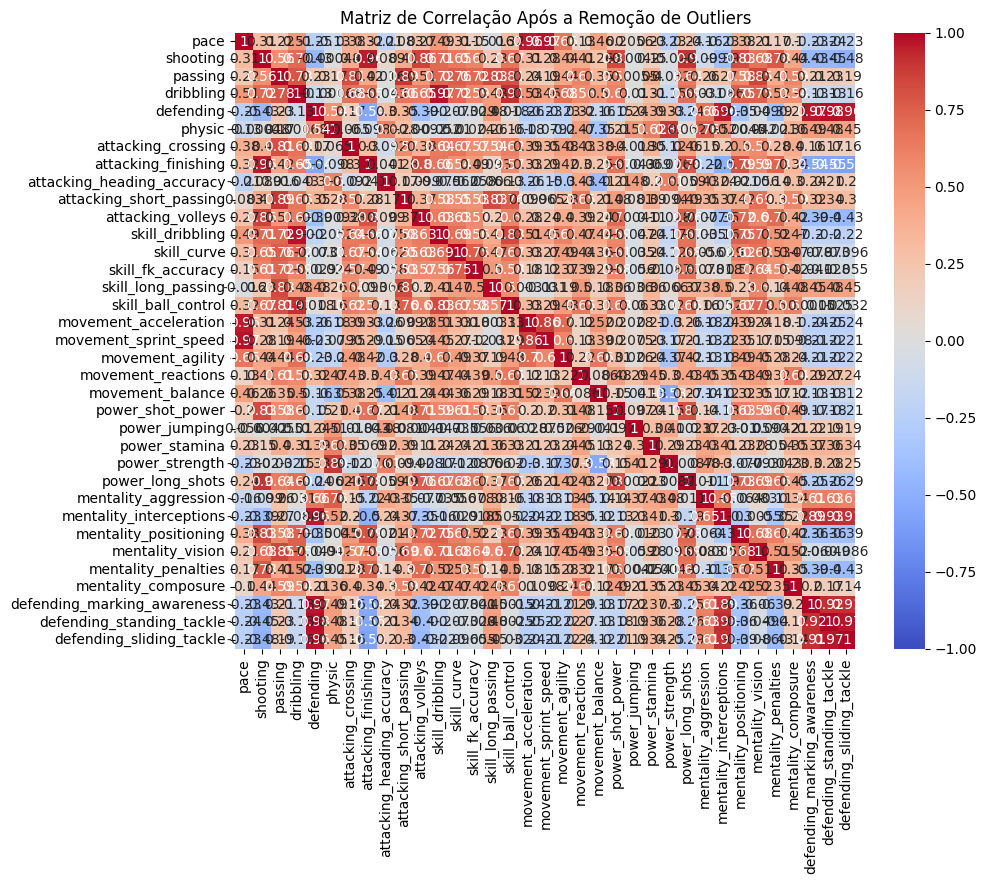

In [27]:
df = remove_multi_outliers(df, 
                           ["movement_sprint_speed", "pace","movement_acceleration"])